<a href="https://colab.research.google.com/github/riuls/an2dl_challenge_2/blob/main/Dataset_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Deep Learning Challenge/an2dl_challenge_2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Deep Learning Challenge/an2dl_challenge_2


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [18]:
tdata = np.load('training_data.npy')
cat = np.load('categories.npy')
valid = np.load('valid_periods.npy')
df_tdata = pd.DataFrame(data=tdata)
df_cat = pd.DataFrame(data = cat)
df_valid = pd.DataFrame(data = valid)

In [19]:
df_tdata.describe()

,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.515814,0.520281,0.528503,0.533299,0.530825,0.525855,0.522132,0.523433,0.530226,0.531927
std,0.000837,0.000813,0.000781,0.000760,0.000757,0.000749,0.000745,0.000741,0.000741,0.000733,...,0.288777,0.289387,0.287716,0.288655,0.289785,0.291925,0.296271,0.302170,0.303567,0.304784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.260870,0.265976,0.275296,0.276525,0.269440,0.259259,0.246887,0.242881,0.246772,0.244700
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.529901,0.535941,0.546886,0.556100,0.552312,0.544393,0.542242,0.550017,0.561833,0.564695
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.774056,0.781060,0.788449,0.795617,0.794872,0.793385,0.794734,0.802337,0.809368,0.815334
max,0.183319,0.178061,0.171051,0.166542,0.165793,0.164041,0.163324,0.162288,0.162288,0.160536,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_cat.describe()

,0
count,48000
unique,6
top,B
freq,10987


In [21]:
df_cat.columns = ['category']
df_cat.head()

,category
0,D
1,D
2,D
3,D
4,D


There is an unbalance in the classes and 'F' class appears to be the most unbalanced

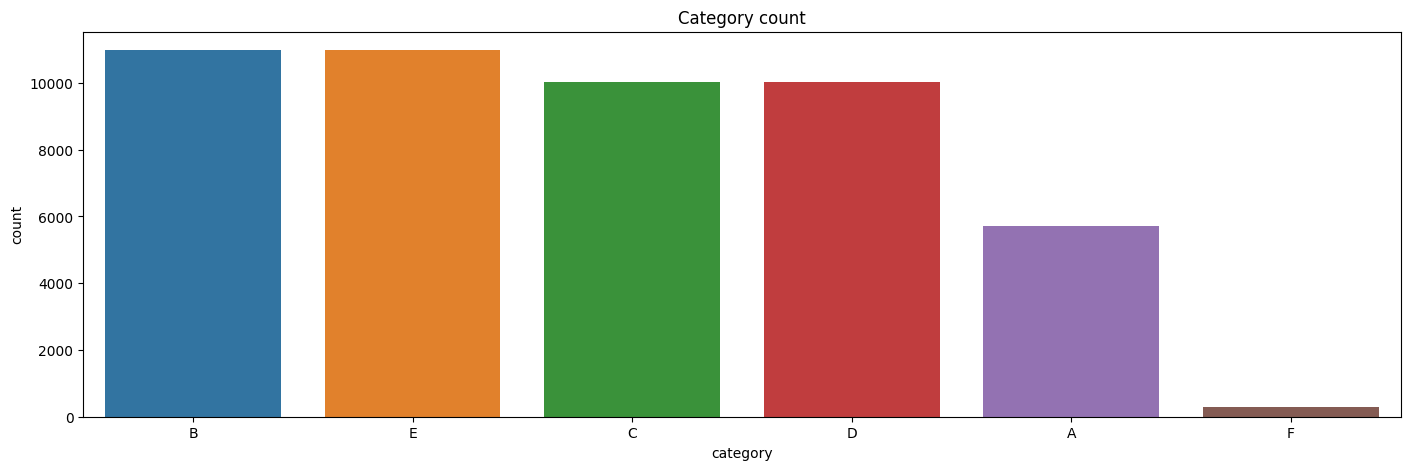

In [22]:
# Inspect activities timestamps
plt.figure(figsize=(17,5))
sns.countplot(x = 'category', data = df_cat, order = df_cat.category.value_counts().index)
plt.title('Category count')
plt.show()

In [44]:
df_data = df_tdata.loc[9000,:]
df_data.describe()

count    2776.000000
mean        0.008783
std         0.074257
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 9000, dtype: float64

Training data values appear to be null until a certain time coordinate

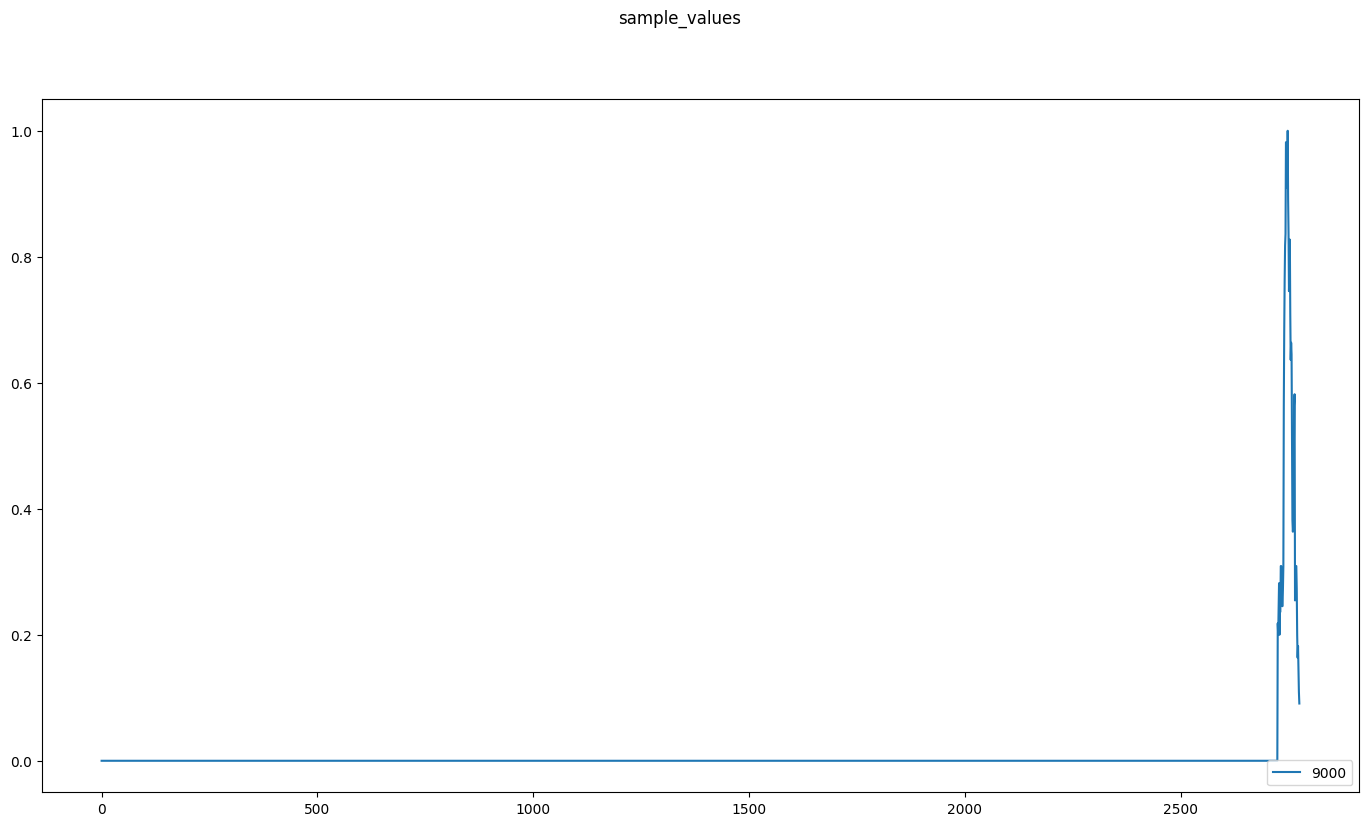

In [45]:
axis = df_data.plot(subplots=True, figsize=(17, 9), title='sample_values')
for ax in axis:
  ax.legend(loc='lower right')